In [14]:
import nbformat

def count_words_in_markdown_cells(notebook_path):
    word_count = 0
    
    with open(notebook_path, 'r') as file:
        notebook = nbformat.read(file, as_version=4)
        
        for cell in notebook['cells']:
            if cell['cell_type'] == 'markdown':
                words = cell['source'].split()
                word_count += len(words)
                
    return word_count

notebook_path = "Roblox.ipynb"
total_word_count = count_words_in_markdown_cells(notebook_path)
print("Total word count in markdown cells:", total_word_count)

Total word count in markdown cells: 481


## Contecst Table



## Intro to roblox

Roblox is an online platform and game creation system that allows users to design and play a wide variety of games and experiences. It was created by David Baszucki and Erik Cassel in 2004 and was officially launched in 2006. Since then, it has gained immense popularity, especially among younger audiences.

At its core, Roblox provides a unique blend of social networking and game development. It allows users to create their own virtual worlds and games using a proprietary building tool called Roblox Studio. With Roblox Studio, users can create 3D environments, design intricate structures, program gameplay mechanics, and even create their own characters.

One of the key aspects of Roblox is its emphasis on user-generated content. Players can explore a vast catalog of games and experiences created by other users. These range from traditional genres like racing, first-person shooters, and role-playing games to unique creations like obstacle courses, virtual hangouts, and fashion showcases. This extensive library of user-created content gives players an endless array of experiences to enjoy.

In addition to playing games, Roblox also serves as a social platform. Players can connect with friends, join communities, and chat with other users through in-game chat features. The platform offers various social interactions, including joining groups, participating in events, and attending virtual parties.

Robux is the virtual currency used within Roblox, which allows players to purchase items, accessories, and special abilities for their characters. Robux can be earned in the game or purchased with real-world money.

Roblox is available on multiple platforms, including Windows, macOS, iOS, Android, Xbox One, and some virtual reality devices. The cross-platform nature of Roblox enables players to connect and play with their friends regardless of the device they are using.

Overall, Roblox provides a creative and immersive platform where players can both play and create games, fostering a vibrant and interactive community. It continues to grow and evolve, with new games and experiences being added regularly, making it an exciting and engaging platform for gamers and game developers alike.

# Imports

In [3]:
!pip install selenium
!pip install pydot
!pip install pydotplus
!pip install requests-html

import os
import re
import time
from time import sleep
from random import randint
from numbers import Number
from typing import Callable, List
from abc import ABC, abstractmethod
from enum import Enum
from functools import partial

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import requests
from requests_html import HTMLSession
from bs4 import BeautifulSoup, Tag as HtmlTag
import pydotplus
from IPython.display import Image, display

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.keys import Keys

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc

from concurrent.futures import ThreadPoolExecutor, as_completed
import concurrent.futures
from multiprocessing import Pool

## Selenium for game names, links & Like precentage
we took data from roblox site such as game links and votes
<div>
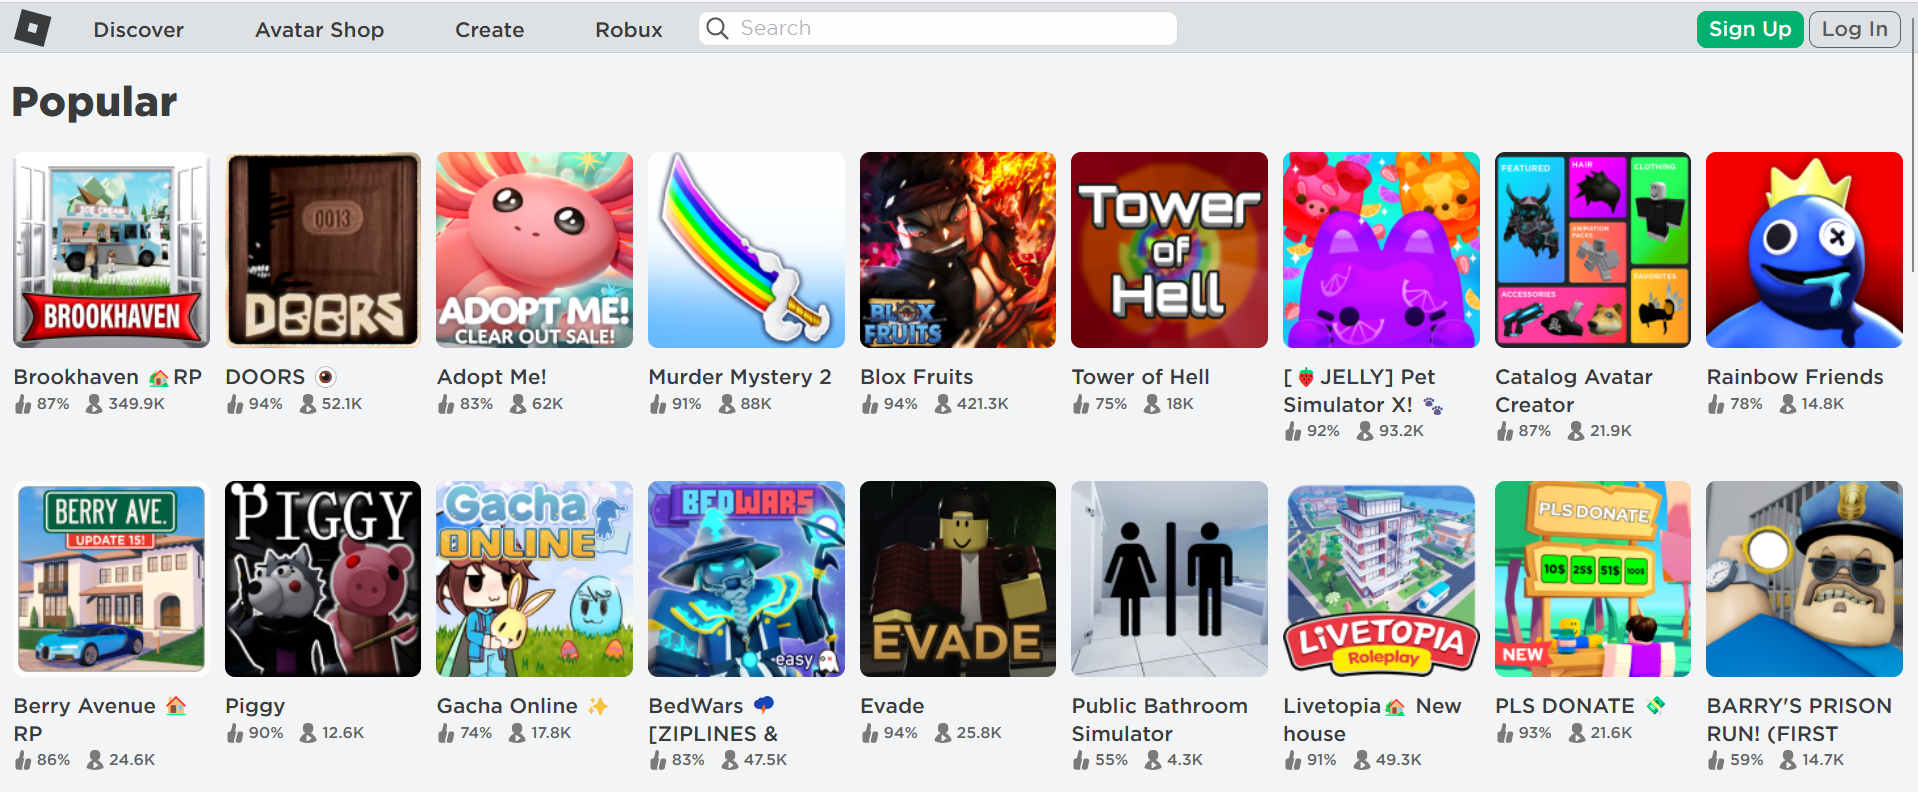
</div>


In [20]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = "https://www.roblox.com/discover/?Keyword=games"
num_scrolls = 120

driver = webdriver.Firefox()
driver.get(url)

# Wait for the body tag to be present
body = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))

for i in range(num_scrolls):
    body.send_keys(Keys.END)
    time.sleep(3)
    body.send_keys(Keys.HOME)
    time.sleep(1)

soup = BeautifulSoup(driver.page_source, "html.parser")

game_urls = []
game_votes = []
game_cards = soup.find_all("div", class_="game-card-container")

for card in game_cards:
    game_url = card.find("a", class_="game-card-link")
    if game_url:
        game_url = game_url.get("href")
    else:
        game_url = "Unknown game URL"
    game_vote = card.find("span", class_="vote-percentage-label")
    if game_vote:
        game_vote = game_vote.text.strip()
    else:
        game_vote = "Unknown vote percentage"
    game_urls.append(game_url)
    game_votes.append(game_vote)

driver.close()
df = pd.DataFrame({"Game URL": game_urls,"Vote_precentage": game_votes})
df.to_csv("games_links_names.csv", index=False)
print(df)


                                               Game URL  \
0     https://www.roblox.com/games/6872265039/BedWar...   
1     https://www.roblox.com/games/6737970321/Liveto...   
2     https://www.roblox.com/games/2753915549/Blox-F...   
3     https://www.roblox.com/games/7991339063/Rainbo...   
4     https://www.roblox.com/games/735030788/Royale-...   
...                                                 ...   
5985  https://www.roblox.com/games/2003622166/help-p...   
5986  https://www.roblox.com/games/12534190624/Cool-...   
5987  https://www.roblox.com/games/8535675228/This-i...   
5988  https://www.roblox.com/games/9546382352/Untitl...   
5989                                   Unknown game URL   

              Vote_precentage  
0                         83%  
1                         91%  
2                         94%  
3                         78%  
4                         88%  
...                       ...  
5985                     100%  
5986                     100%  
598

## Getting More Data
like Game Name, Active Players, Favorits, Visits, Created Date, Last update date, Game Genre, server size.
## 
<div>
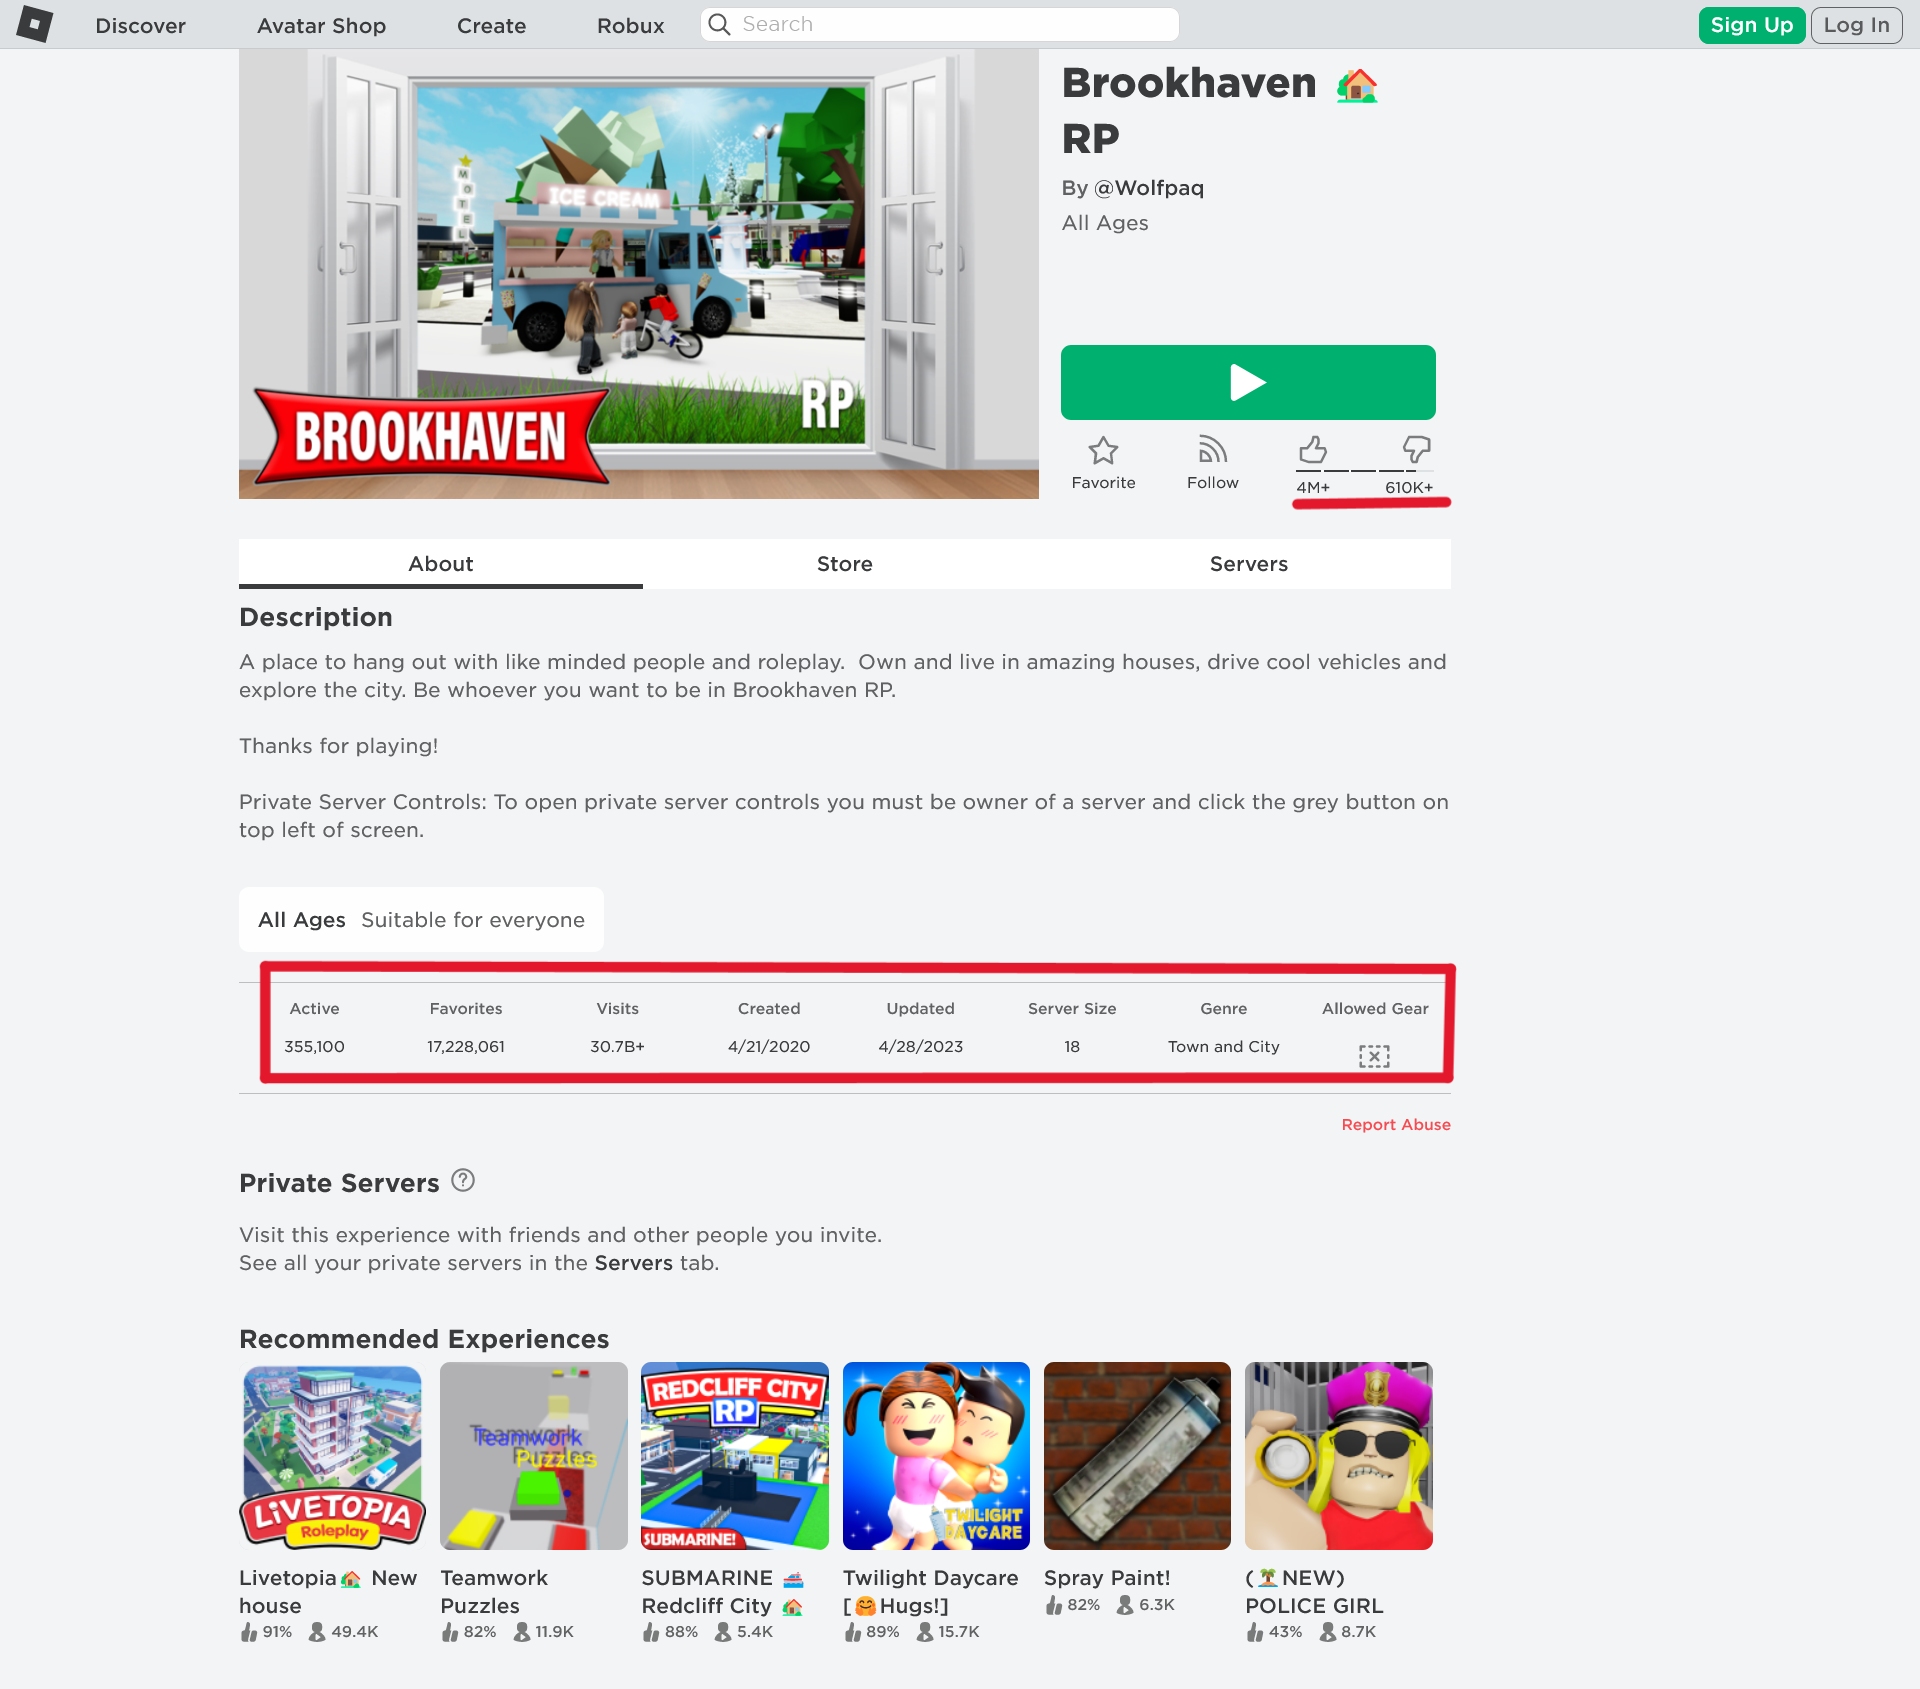
</div>

## Game Name

In [2]:
def get_game_name(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    game_name_element = soup.find("h1", class_="game-name")

    if game_name_element:
        game_name = game_name_element.text.strip()
        game_name_clean = re.sub(r'[^\w\s]', '', game_name)
        return game_name_clean
    else:
        return "Game name not found."

## Game creator

In [3]:
def get_game_creator(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    creator_element = soup.find("div", class_="game-creator")

    if creator_element:
        creator_name_element = creator_element.find("a", class_="text-name")
        if creator_name_element:
            game_creator = creator_name_element.text.strip()
            return game_creator

    return "Game creator not found."

## Active Players

In [4]:
def get_active_players(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    active_element = soup.find("p", class_="text-label text-overflow font-caption-header", string="Active")

    if active_element:
        active_value_element = active_element.find_next_sibling("p", class_="text-lead font-caption-body wait-for-i18n-format-render")
        if active_value_element:
            active_value = active_value_element.text.strip()
            return active_value
        else:
            return "Active value not found."
    else:
        return "Element containing 'Active' not found."

## Favorites

In [5]:
def get_favorites_count(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    favorites_elem = soup.find_all("li", {"class": "game-stat game-stat-width"})
    for elem in favorites_elem:
        if elem.find("p", {"class": "text-label text-overflow font-caption-header"}).text.strip() == "Favorites":
            favorites_count = elem.find_all("span", {"class": "game-favorite-count"})[0].text.strip()
            return favorites_count
    return None

## Visits

In [6]:
def get_visits_count(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    visits_elem = soup.find("p", {"id": "game-visit-count", "class": "text-lead font-caption-body wait-for-i18n-format-render"})
    if visits_elem:
        visits_count_str = visits_elem.get("title")
        visits_count_str = visits_count_str.split()[0]
        visits_count_str = visits_count_str.replace(",", "") 
        visits_count = int(visits_count_str) 
        return visits_count
    return None

## Created Date

In [7]:
def get_game_created_date(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    created_element = soup.find("p", class_="text-label text-overflow font-caption-header", string="Created")

    if created_element:
        created_date_element = created_element.find_next_sibling("p", class_="text-lead font-caption-body")
        if created_date_element:
            created_date = created_date_element.text.strip()
            return created_date
        else:
            return "Created date not found."
    else:
        return "Element containing 'Created' not found."

## Updated Date

In [8]:
def get_game_updated_date(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    updated_element = soup.find("p", class_="text-label text-overflow font-caption-header", string="Updated")

    if updated_element:
        updated_date_element = updated_element.find_next_sibling("p", class_="text-lead font-caption-body")
        if updated_date_element:
            updated_date = updated_date_element.text.strip()
            return updated_date
        else:
            return "Updated date not found."
    else:
        return "Element containing 'Updated' not found."

## Game Genre

In [9]:
def get_game_genre(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    genre_element = soup.find("p", class_="text-label text-overflow font-caption-header", string="Genre")

    if genre_element:
        genre_value_element = genre_element.find_next_sibling("p", class_="text-lead font-caption-body wait-for-i18n-format-render")
        if genre_value_element:
            genre_value = genre_value_element.text.strip()
            return genre_value
        else:
            return "Genre value not found."
    else:
        return "Element containing 'Genre' not found."

## Server Size

In [10]:
def get_server_size(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    servers_element = soup.find("p", class_="text-label text-overflow font-caption-header", string="Server Size")

    if servers_element:
        servers_value_element = servers_element.find_next_sibling("p", class_="text-lead font-caption-body wait-for-i18n-format-render")
        if servers_value_element:
            servers_value = servers_value_element.text.strip()
            return servers_value
        else:
            return "Server size value not found."
    else:
        return "Element containing 'Server Size' not found."

## Loop the urls to make a BIG DF!!

In [26]:
df = pd.read_csv('games_links_names.csv')

In [27]:
def get_game_info(row):
    likes = row['Vote_precentage']
    response = requests.get(row['Game URL'])
    soup = BeautifulSoup(response.content, 'html.parser')
    
    name = get_game_name(row['Game URL'])
    creator = get_game_creator(row['Game URL'])
    active = get_active_players(row['Game URL'])
    favorite = get_favorites_count(row['Game URL'])
    visit = get_visits_count(row['Game URL'])
    create_date = get_game_created_date(row['Game URL'])
    update_date = get_game_updated_date(row['Game URL'])
    genre = get_game_genre(row['Game URL'])
    server_size = get_server_size(row['Game URL'])
    
    return {
        'name': name,
        'creator': creator,
        'likes': likes,
        'active_players': active, 
        'favorites': favorite, 
        'visits': visit,
        'created_date': create_date,
        'update_date': update_date,
        'genre': genre,
        'server_size': server_size,
        'url': row['Game URL']
    }

with ThreadPoolExecutor() as executor:
    futures = [executor.submit(get_game_info, row) for index, row in df.iterrows()]
    results = []
    
    for future in tqdm(as_completed(futures), total=len(futures)):
        result = future.result()
        results.append(result)

df_big = pd.DataFrame(results)
df_big.to_csv("Big_df.csv", index=False)
print(df_big.head())

100%|██████████| 5989/5989 [1:23:26<00:00,  1.20it/s]  

                        name                        creator likes  \
0    Dont Press The Button 4                  Gliko Studios   85%   
1  BedWars  ZIPLINES  WIZARD                        Easy.gg   83%   
2                      Evade  Hexagon Development Community   94%   
3                Blox Fruits                Gamer Robot Inc   94%   
4                   3008 272                   @uglyburger0   91%   

  active_players  favorites        visits created_date update_date      genre  \
0          7,637    935,614  6.502635e+08    6/12/2020    5/6/2023  Adventure   
1         45,608  3,512,115  6.534062e+09    5/27/2021   5/10/2023   Fighting   
2         25,615  3,154,188  2.023428e+09    6/10/2022   4/29/2023     Horror   
3        424,865  7,752,562  1.694738e+10    1/16/2019   4/17/2023  Adventure   
4         13,341  3,904,173  1.451300e+09    1/20/2019   4/28/2023     Horror   

  server_size                                                url  
0          10  https://www.robl

## Cleaning the data

In [4]:
df = pd.read_csv('Big_df.csv')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5989 non-null   object 
 1   creator         5989 non-null   object 
 2   likes           5989 non-null   object 
 3   active_players  5989 non-null   object 
 4   favorites       5988 non-null   object 
 5   visits          5988 non-null   float64
 6   created_date    5989 non-null   object 
 7   update_date     5989 non-null   object 
 8   genre           5989 non-null   object 
 9   server_size     5989 non-null   int64  
 10  url             5989 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 514.8+ KB


,name,creator,likes,active_players,favorites,visits,created_date,update_date,genre,server_size,url
0,Dont Press The Button 4,Gliko Studios,85%,"7,637","935,614",6.502635e+08,06/12/2020,05/06/2023,Adventure,10,https://www.roblox.com/games/5171093784/Dont-P...
1,BedWars ZIPLINES WIZARD,Easy.gg,83%,"45,608","3,512,115",6.534062e+09,5/27/2021,05/10/2023,Fighting,40,https://www.roblox.com/games/6872265039/BedWar...
2,Evade,Hexagon Development Community,94%,"25,615","3,154,188",2.023428e+09,06/10/2022,4/29/2023,Horror,15,https://www.roblox.com/games/9872472334/Evade?...
3,Blox Fruits,Gamer Robot Inc,94%,"424,865","7,752,562",1.694738e+10,1/16/2019,4/17/2023,Adventure,12,https://www.roblox.com/games/2753915549/Blox-F...
4,3008 272,@uglyburger0,91%,"13,341","3,904,173",1.451300e+09,1/20/2019,4/28/2023,Horror,16,https://www.roblox.com/games/2768379856/3008-2...


change the type of the cells to an int
and the dates to date type

In [6]:
df.loc[df['likes'] == 'Unknown vote percentage', 'likes'] = '0'
df['likes'] = pd.to_numeric(df['likes'].str.rstrip('%'), errors='coerce').astype('float').astype('Int64')

df['active_players'] = df['active_players'].str.replace(',', '')
df['active_players'] = df['active_players'].astype('Int64')

df['favorites'] = df['favorites'].str.replace(',', '')
df['favorites'] = df['favorites'].astype('Int64')

df['visits'] = df['visits'].astype('Int64')

df['created_date'] = pd.to_datetime(df['created_date'], format='%m/%d/%Y', errors='coerce')

df['update_date'] = pd.to_datetime(df['update_date'], format='%m/%d/%Y', errors='coerce')

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            5989 non-null   object        
 1   creator         5989 non-null   object        
 2   likes           5989 non-null   Int64         
 3   active_players  5989 non-null   Int64         
 4   favorites       5988 non-null   Int64         
 5   visits          5988 non-null   Int64         
 6   created_date    5988 non-null   datetime64[ns]
 7   update_date     5988 non-null   datetime64[ns]
 8   genre           5989 non-null   object        
 9   server_size     5989 non-null   int64         
 10  url             5989 non-null   object        
dtypes: Int64(4), datetime64[ns](2), int64(1), object(4)
memory usage: 538.2+ KB


,name,creator,likes,active_players,favorites,visits,created_date,update_date,genre,server_size,url
0,Dont Press The Button 4,Gliko Studios,85,7637,935614,650263494,2020-06-12,2023-05-06,Adventure,10,https://www.roblox.com/games/5171093784/Dont-P...
1,BedWars ZIPLINES WIZARD,Easy.gg,83,45608,3512115,6534061611,2021-05-27,2023-05-10,Fighting,40,https://www.roblox.com/games/6872265039/BedWar...
2,Evade,Hexagon Development Community,94,25615,3154188,2023428192,2022-06-10,2023-04-29,Horror,15,https://www.roblox.com/games/9872472334/Evade?...
3,Blox Fruits,Gamer Robot Inc,94,424865,7752562,16947376345,2019-01-16,2023-04-17,Adventure,12,https://www.roblox.com/games/2753915549/Blox-F...
4,3008 272,@uglyburger0,91,13341,3904173,1451300303,2019-01-20,2023-04-28,Horror,16,https://www.roblox.com/games/2768379856/3008-2...


checking how many blank's cells we have

In [165]:
df.isna().sum()

name              0
creator           0
likes             0
active_players    0
favorites         1
visits            1
created_date      1
update_date       1
genre             0
server_size       0
url               0
dtype: int64

removing the rows of the blank's cells

In [167]:
df.dropna(inplace=True)

checking how many elements not found in genre

In [8]:
df['genre'].value_counts()

All Genres                               3408
Adventure                                 675
Horror                                    533
Fighting                                  434
Comedy                                    184
RPG                                       179
Town and City                             160
FPS                                       120
Military                                  102
Building                                   83
Sports                                     43
Sci-Fi                                     35
Medieval                                   15
Naval                                       9
Western                                     7
Element containing 'Genre' not found.       2
Name: genre, dtype: int64

removing the genre "Element containing 'Genre' not found."

In [9]:
df = df.loc[df['genre'] != "Element containing 'Genre' not found."]
df['genre'].value_counts()

All Genres       3408
Adventure         675
Horror            533
Fighting          434
Comedy            184
RPG               179
Town and City     160
FPS               120
Military          102
Building           83
Sports             43
Sci-Fi             35
Medieval           15
Naval               9
Western             7
Name: genre, dtype: int64

In [174]:
df.to_csv('df_clean.csv', index=False)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5988
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            5983 non-null   object        
 1   creator         5983 non-null   object        
 2   likes           5983 non-null   Int64         
 3   active_players  5983 non-null   Int64         
 4   favorites       5983 non-null   Int64         
 5   visits          5983 non-null   Int64         
 6   created_date    5983 non-null   datetime64[ns]
 7   update_date     5983 non-null   datetime64[ns]
 8   genre           5983 non-null   object        
 9   server_size     5983 non-null   int64         
 10  url             5983 non-null   object        
dtypes: Int64(4), datetime64[ns](2), int64(1), object(4)
memory usage: 584.3+ KB


## EDA

distribution of genres

In [17]:
df = pd.read_csv('df_clean.csv')

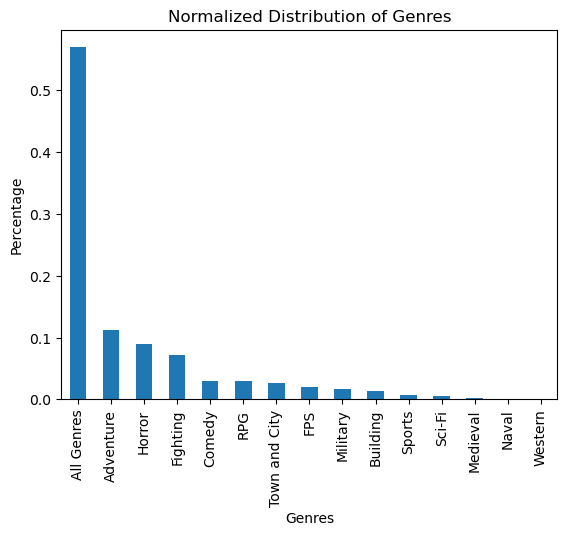

In [18]:
genre_counts = df['genre'].value_counts(normalize=True)
genre_counts.plot(kind='bar')
plt.title('Normalized Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.show()

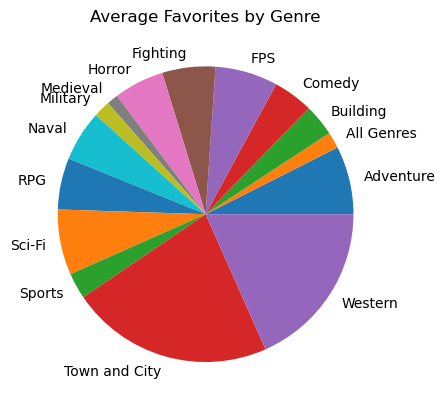

In [19]:
genre_avg = df.groupby('genre')['favorites'].mean()
plt.pie(genre_avg, labels=genre_avg.index)
plt.title('Average Favorites by Genre')
plt.show()